In [1]:
import torch
import torchvision # pytorch对CV的库
from torch.utils import data # 读取小批量数据的函数
from torchvision import transforms # 对数据操作
from drawPlot import use_svg_display
from matplotlib import pyplot as plt
import useTool

In [2]:
# 通过ToTensor实例将图像数据从PIL类型变换成32位浮点数格式，
# 并除以255使得所有像素的数值均在0到1之间
trans = transforms.ToTensor() # 把图片转成pytorch的tensor
mnist_train = torchvision.datasets.FashionMNIST( # 从torchvision datasets里拿FashionMNIST
                    root="../data", 
                    train=True, # 下载的是训练数据集
                    transform=trans, 
                    download=True) # 默认从网上下载
mnist_test = torchvision.datasets.FashionMNIST(
                    root="../data", 
                    train=False, 
                    transform=trans, 
                    download=True)

In [3]:
len(mnist_train), len(mnist_test)

(60000, 10000)

In [4]:
mnist_train[0][0].shape # 长和宽均为28的黑白图片

torch.Size([1, 28, 28])

两个可视化函数

In [5]:
def get_fashion_mnist_labels(labels): 
    """返回Fashion-MNIST数据集的⽂本标签"""
    text_labels = ['t-shirt', 'trouser', 'pullover', 'dress', 'coat', 
                   'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']
    return [text_labels[int(i)] for i in labels]

In [6]:
def show_images(imgs, num_rows, num_cols, titles=None, scale=1.5): 
    """绘制图像列表"""
    figsize = (num_cols * scale, num_rows * scale)
    _, axes = plt.subplots(num_rows, num_cols, figsize=figsize)
    axes = axes.flatten()
    for i, (ax, img) in enumerate(zip(axes, imgs)):
        if torch.is_tensor(img):
            # 图⽚张量
            ax.imshow(img.numpy())
        else:
            # PIL图⽚
            ax.imshow(img)
        ax.axes.get_xaxis().set_visible(False)
        ax.axes.get_yaxis().set_visible(False)
        if titles:
            ax.set_title(titles[i])
    return axes

array([<AxesSubplot: title={'center': 'ankle boot'}>,
       <AxesSubplot: title={'center': 't-shirt'}>,
       <AxesSubplot: title={'center': 't-shirt'}>,
       <AxesSubplot: title={'center': 'dress'}>,
       <AxesSubplot: title={'center': 't-shirt'}>,
       <AxesSubplot: title={'center': 'pullover'}>,
       <AxesSubplot: title={'center': 'sneaker'}>,
       <AxesSubplot: title={'center': 'pullover'}>,
       <AxesSubplot: title={'center': 'sandal'}>,
       <AxesSubplot: title={'center': 'sandal'}>,
       <AxesSubplot: title={'center': 't-shirt'}>,
       <AxesSubplot: title={'center': 'ankle boot'}>,
       <AxesSubplot: title={'center': 'sandal'}>,
       <AxesSubplot: title={'center': 'sandal'}>,
       <AxesSubplot: title={'center': 'sneaker'}>,
       <AxesSubplot: title={'center': 'ankle boot'}>,
       <AxesSubplot: title={'center': 'trouser'}>,
       <AxesSubplot: title={'center': 't-shirt'}>], dtype=object)

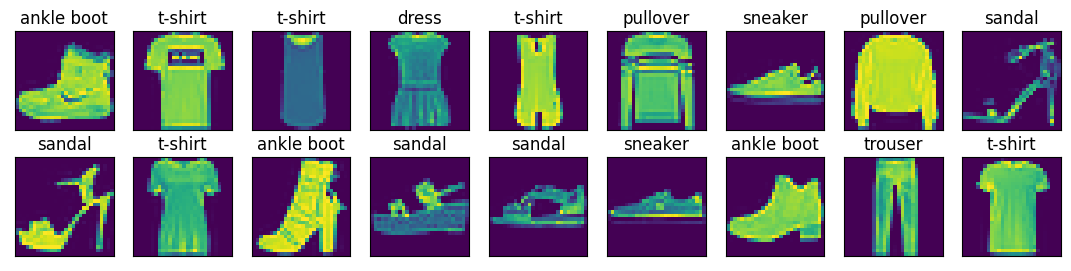

In [7]:
X, y = next(iter(data.DataLoader(mnist_train, batch_size=18))) # iter构造出iterator，next拿到第一个小批量，记为一个 X 和 y
show_images(X.reshape(18, 28, 28), 2, 9, titles=get_fashion_mnist_labels(y))

In [14]:
batch_size = 256

def get_dataloader_workers():  # 根据CPU不同而有差异
    """使⽤4个进程来读取数据"""
    return 4

train_iter = data.DataLoader(mnist_train, batch_size, shuffle=True, 
                             num_workers=get_dataloader_workers())

读取训练集所需时间

In [15]:
timer = useTool.Timer()
for X, y in train_iter:
    continue
f'{timer.stop():.2f} sec'

# 最好读的比训的快

'0.88 sec'